# Adapting LLM Q&A to our PDF data using LangChain through Open Source Models
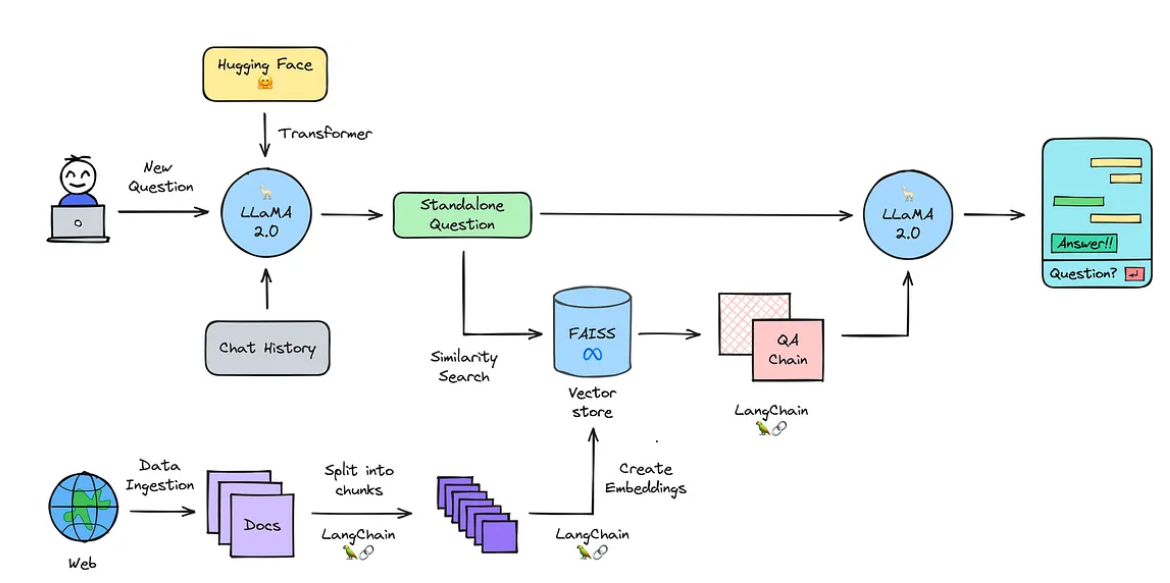

## Initialize hugging face aunthetication using access token.


In [1]:
import os
os.environ['HuggingFaceHub_API_Token']= 'mention_your_key_here'


## Listing CV PDF Files

In the code cell below, we list the tax filing instruction files stored locally in the 'docs/' directory using the `ls` command. This command is commonly used to display the contents of a directory.


In [2]:
!ls -lh docs/
text_folder = 'docs'


total 228K
-rw-r--r-- 1 jupyter jupyter  50K Jan  8 09:22 'Profile Linkedin Tony.pdf'
-rw-r--r-- 1 jupyter jupyter 174K Jan  8 09:22  Resume-Hachem-CHEAIB.pdf


## Demo: Creating and Querying Vector Index

### Step 1: Create the Query
We start by creating a query that includes the questions "Who is Tony?" and "Who is Hachem?"


In [3]:
query = """Who is Tony?
Who is Hachem?"""

query


'Who is Tony?\nWho is Hachem?'

### Step 2: Create Vector Store

Next, we create a vector store using a subset of documents from the specified text folder.

The following code snippet demonstrates the importation of key modules from the `langchain` library:

- `UnstructuredPDFLoader`: Handles loading and parsing of unstructured PDF documents.
- `CharacterTextSplitter`: Facilitates effective text splitting, breaking down textual data into characters.
- `HuggingFaceEmbeddings`: Integrates Hugging Face's embeddings, enabling state-of-the-art language representations.
- `FAISS`: Provides support for efficient storage and retrieval of document vectors through FAISS.
- `torch`: Integrates with PyTorch, a powerful deep learning library, allowing advanced customization and compatibility with neural network models.

In [4]:
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
import torch


#### Get a list of all files in the specified directory


In [5]:
all_files = [f for f in os.listdir(text_folder) if os.path.isfile(os.path.join(text_folder, f))]
all_files


['Resume-Hachem-CHEAIB.pdf', 'Profile Linkedin Tony.pdf']

#### Load documents from PDF files

In [6]:
documents = []
for file in all_files:
    loader = UnstructuredPDFLoader(os.path.join(text_folder, file))
    documents.extend(loader.load())
    
documents


[Document(page_content='Hachem CHEAIB\n\nNantes, Pays de la Loire, France\n\nhachemcheaib@outlook.com\n\n+33761394660\n\nlinkedin.com/in/hachemcheaib\n\nSummary Hello! I am Hachem Cheaib, a dedicated and passionate professional with a diverse background in Software Engineering, Data Science, and Artificial Intelligence. With over 4 years of experience, I have a track record of success in a variety of roles across different domains.\n\nCurrently, I work as a Software, Data, and AI Engineer at Sogeti, focusing on implementing innovative solutions. Simultaneously, I serve as a Career Manager where I support colleagues in their career development and growth.\n\nOutside of my professional life, I am continually learning and expanding my skillset, with certifications in Google Cloud and a strong foundation in Artificial Intelligence, Machine Learning, and data processing.\n\nI am enthusiastic about the future of technology and its potential to make a positive impact. Let\'s connect, collabor

#### Split documents into text chunks

In [7]:
text_splitter = CharacterTextSplitter(separator='\n', chunk_size=1000, chunk_overlap=50)
text_chunks = text_splitter.split_documents(documents)
text_chunks


[Document(page_content='Hachem CHEAIB\nNantes, Pays de la Loire, France\nhachemcheaib@outlook.com\n+33761394660\nlinkedin.com/in/hachemcheaib\nSummary Hello! I am Hachem Cheaib, a dedicated and passionate professional with a diverse background in Software Engineering, Data Science, and Artificial Intelligence. With over 4 years of experience, I have a track record of success in a variety of roles across different domains.\nCurrently, I work as a Software, Data, and AI Engineer at Sogeti, focusing on implementing innovative solutions. Simultaneously, I serve as a Career Manager where I support colleagues in their career development and growth.\nOutside of my professional life, I am continually learning and expanding my skillset, with certifications in Google Cloud and a strong foundation in Artificial Intelligence, Machine Learning, and data processing.', metadata={'source': 'docs/Resume-Hachem-CHEAIB.pdf'}),
 Document(page_content="I am enthusiastic about the future of technology and i

#### Set the Hugging Face model name and model arguments

In [8]:
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model_name


'sentence-transformers/all-MiniLM-L6-v2'

##### Check GPU availability

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [10]:
model_kwargs = {'device': device.type}
model_kwargs


{'device': 'cuda'}

#### Initialize Hugging Face embeddings

In [11]:
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)
embeddings


/opt/conda/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
), model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={'device': 'cuda'}, encode_kwargs={}, multi_process=False)

#### Create a vector store using FAISS from the text chunks and embeddings


In [12]:
vectorstore=FAISS.from_documents(text_chunks, embeddings)
vectorstore


#### Query the vectore store

In [13]:
vectorstore.similarity_search(query)

[Document(page_content='Hachem CHEAIB - page 1\nTNT (Talent Needs Trend), improve the synergy between skills, benchmarks and services for clients, while identifying possible cycles, weak signals and disruptions. Additionally, it aims to more effectively measure employee experiences and build loyalty through a job recommendation system based on various factors and an interactive satisfaction chatbot providing personalized advice to improve well- being and influencing recommendations future missions.\nDuring my contribution, as tech lead, my responsibilities focused on the following areas:\nTech lead: 1. Monitoring the skills development of all collaborators in the Data team. 2. Technical support for developers and data scientists. 3. Feedback on tasks and projects. 4. Definition and implementation of good practices. 5. Collaboration with DevOps teams for technological choices. 6. Animation of daily meetings.', metadata={'source': 'docs/Resume-Hachem-CHEAIB.pdf'}),
 Document(page_content

### Step 3: Create the LLM model

Next, we create call the LLM model and put in heart the created vectore store.

The following code snippet showcases the importation of modules from the `transformers` library and specific modules from the `langchain` library:

- `AutoTokenize`r and `AutoModelForCausalLM`: Imported from transformers for handling `tokenization` and causal language modeling.
- `pipeline`: Another module from `transformers` for simplified access to a variety of NLP tasks.
- `HuggingFacePipeline`: A module from `langchain` that likely provides additional functionalities or customization options when working with Hugging Face's transformers.
- `RetrievalQA`: Imported from `langchain.chains` for implementing a question-answering component within the LangChain framework.

In [14]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA


### Setting Language Model Name

In the code snippet below, the variable `llm_model_name` is assigned the value `'TinyLlama/TinyLlama-1.1B-Chat-v1.0'`. This represents the name or identifier of a specific language model, likely used in the context of natural language processing tasks.


In [15]:
llm_model_name = 'TinyLlama/TinyLlama-1.1B-Chat-v1.0'


##### Initializing Tokenizer from Pretrained Model

The following code initializes a tokenizer using the `AutoTokenizer.from_pretrained` method, specifying the pretrained language model named by the variable `llm_model_name`. The resulting `tokenizer` object is then displayed.


In [16]:
tokenizer = AutoTokenizer.from_pretrained(llm_model_name)
tokenizer


LlamaTokenizerFast(name_or_path='TinyLlama/TinyLlama-1.1B-Chat-v1.0', vocab_size=32000, model_max_length=2048, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '</s>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

##### Initializing Causal Language Model from Pretrained Model

In the following code, a causal language model is initialized using the `AutoModelForCausalLM.from_pretrained` method. The pretrained language model specified by the variable `llm_model_name` is loaded onto the device automatically (`device_map='auto'`), and the model's tensor data type is set to `torch.float16`.


In [17]:
model = AutoModelForCausalLM.from_pretrained(llm_model_name,
                                             device_map='auto',
                                             torch_dtype=torch.float16
                                             )
model


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 2048)
    (layers): ModuleList(
      (0-21): 22 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (down_proj): Linear(in_features=5632, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  (lm_head): Linear(i

##### Creating Text Generation Pipeline

The code snippet below demonstrates the creation of a text generation pipeline using the `pipeline` function from the `transformers` library. Various parameters are set for the pipeline, including the pretrained language model (`model`), tokenizer (`tokenizer`), tensor data type (`torch.bfloat16`), device allocation (`device_map='auto'`), maximum number of generated tokens (`max_new_tokens`), and other generation-related parameters.


In [18]:
pipe = pipeline("text-generation",
                model=model,
                tokenizer= tokenizer,
                torch_dtype=torch.bfloat16,
                device_map="auto",
                max_new_tokens = 1024,
                do_sample=True,
                top_k=10,
                num_return_sequences=1,
                eos_token_id=tokenizer.eos_token_id
                )
pipe


##### Creating Hugging Face Pipeline with LangChain


In the code snippet below, a LangChain pipeline (`HuggingFacePipeline`) is created, utilizing the previously defined text generation pipeline (`pipe`). Additional model-specific arguments are provided, setting the temperature to 0 for the language model.


In [19]:
llm = HuggingFacePipeline(pipeline=pipe, model_kwargs={'temperature':0})
llm


HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7f8e042d0dc0>, model_kwargs={'temperature': 0})

##### Creating Retrieval Question-Answering Chain

The following code snippet demonstrates the creation of a Retrieval Question-Answering chain (`chain`) using the LangChain module. The chain is initialized with the following components:

- `llm`: The Hugging Face pipeline for text generation, configured earlier.
- `chain_type`: A specific chain type, denoted as "stuff."
- `return_source_documents`: Set to `True` to include the source documents in the returned output.
- `retriever`: The retriever component is defined as a vector store converted to a retriever using `vectorstore.as_retriever()`.


In [20]:
chain =  RetrievalQA.from_chain_type(
    llm=llm # -> 'TinyLlama/TinyLlama-1.1B-Chat-v1.0' [Traitement de requete] -> Traitement automatique de langage naturel
    , chain_type="stuff"
    , return_source_documents=True
    , retriever=vectorstore.as_retriever() # -> 'sentence-transformers/all-MiniLM-L6-v2' [Donnees] -> Correspondance avec la base vectoriel
) 
chain


RetrievalQA(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['context', 'question'], template="Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n{context}\n\nQuestion: {question}\nHelpful Answer:"), llm=HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7f8e042d0dc0>, model_kwargs={'temperature': 0})), document_variable_name='context'), return_source_documents=True, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7f8e0773a320>))

##### Invoking Retrieval Question-Answering Chain

In the code snippet below, the Retrieval Question-Answering chain (`chain`) is invoked with a specific query. The result is stored in the variable `result`, and the generated answer is accessed using `result['result']`.


In [21]:
result = chain.invoke(query)
result


{'query': 'Who is Tony?\nWho is Hachem?',
 'result': ' Hachem CHEAIB (pronounced "Cheaib") is a dedicated software and AI technician with 4 years of experience. He is a passionate professional, focused on implementing innovative solutions, and is currently working as a software engineer at SoGeTi.',
 'source_documents': [Document(page_content='Hachem CHEAIB - page 1\nTNT (Talent Needs Trend), improve the synergy between skills, benchmarks and services for clients, while identifying possible cycles, weak signals and disruptions. Additionally, it aims to more effectively measure employee experiences and build loyalty through a job recommendation system based on various factors and an interactive satisfaction chatbot providing personalized advice to improve well- being and influencing recommendations future missions.\nDuring my contribution, as tech lead, my responsibilities focused on the following areas:\nTech lead: 1. Monitoring the skills development of all collaborators in the Data t

The result schema obtained from the Retrieval Question-Answering Chain consists of three main components: `query`, `result`, and `source_documents`. Here's a breakdown of each:

1. `query`:
    - Type: String
    - Description: Represents the original query provided to the Retrieval Question-Answering Chain.
2. `result`:
    - Type: String
    - Description: Contains the generated answer or response to the query. In this specific result, it provides information related to the academic and professional background of the individual, including education, work experience, and current role.
3. `source_documents`:
    - Type: List of Documents
    - Description: Contains a list of documents (`Document` objects) that contributed to the generation of the answer. Each `Document` includes:
        1. `page_content`: The content of the document.
        2. `metadata`: Additional metadata associated with the document, in this case, the 'source' field specifying the document source file.

In [22]:
print(result['result'])


 Hachem CHEAIB (pronounced "Cheaib") is a dedicated software and AI technician with 4 years of experience. He is a passionate professional, focused on implementing innovative solutions, and is currently working as a software engineer at SoGeTi.


##### Accessing Source Documents in the Result

The following code snippet iterates over the source documents present in the result obtained from the Retrieval Question-Answering chain. The metadata information, specifically the `source` field, is extracted and printed for each source document.


In [23]:
for source in result['source_documents']:
    print(source.metadata['source'])
    

docs/Resume-Hachem-CHEAIB.pdf
docs/Resume-Hachem-CHEAIB.pdf
docs/Resume-Hachem-CHEAIB.pdf
docs/Resume-Hachem-CHEAIB.pdf


## Chatbot mode

In [ ]:
X = True

while True:
    
    if X:
        print("[exit|quit] pour sortir")
        print()
        X = False
        
    # Take user input
    user_input = input(">> ")

    # Check if the user wants to quit
    if user_input.lower() in ["quit", "exit"]:
        print("Exiting the conversation.")
        break
    
    result = chain.invoke(user_input)
    
    print(f"\t<<{result['result']}")
    print()
    
    print("<< sources:")
    for source in result['source_documents']:
        print(f"\t<< {source.metadata['source']}")
    print()
    
    

[exit|quit] pour sortir



>>  Do you know anyone that is cloud architect?


/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (2048). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


	<< Absolutely! Here is a list of cloud architects with their contact information, qualifications, and skills:

Contact
0134490643 (Work) tjarriault@free.fr
www.linkedin.com/in/tonyjarriault (LinkedIn) Professional Cloud Security Engineer
Jarriault Tony
Solutions Architect @Sogeti part of CapGemini Greater Toulouse Metropolitan Area
Summary
I'm a seasoned Cloud Solution Architect with over 10 years of experience in infrastructure and on-premise application management. I have a passion for emerging technologies and have been immersed in the cloud for over 5 years. My focus has been on AWS, GCP, and Azure cloud environments. I have a deep understanding of AWS Services such as EC2, S3, RDS, EMR, KMS, and API Gateway. I also have significant experience with the GCP stack including Compute Engines, Cloud SQL, and Cloud Storage. In this role, I work with customers and partners to develop and implement cloud solutions that meet their business needs. I am also a member of the Sogeti cloud team

>>  I need one more contact for Python developping


/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


	<<
Sure! I'm available for further discussions via email or phone, depending on your preference. Feel free to reach out to me at [email] and I'll get back to you shortly.

<< sources:
	<< docs/Resume-Hachem-CHEAIB.pdf
	<< docs/Resume-Hachem-CHEAIB.pdf
	<< docs/Profile Linkedin Tony.pdf
	<< docs/Resume-Hachem-CHEAIB.pdf



## Flask

#### Save the chain

In [ ]:
import pickle

# Save the RetrievalQA instance to a file
with open('saved_chain.pkl', 'wb') as file:
    pickle.dump(chain, file)


#### Launch the API

In [ ]:
# !python app.py


#### POST request

In [30]:
!curl -X POST -H "Content-Type: application/json" -d '{"query": "Tell me more about Hachem"}' http://127.0.0.1:5001/api/search


{
  "result": " Hachem was responsible for taking user stories into account while developing EEG data using various tools, such as EEG acquisition protocols. In addition, he implemented an EEG-based learning system with cloud deployment for optimal accessibility and scalability. Additionally, he organized round tables on various aspects of artificial intelligence to promote collaboration and discussions between the team."
}


In [ ]:
!curl -X POST -H "Content-Type: application/json" -d "{\"query\": \"What is the last name of Tony?\"}" http://10.128.15.193:5001/api/search


## Streamlit


In [ ]:
pip install streamlit openai langchain

# Start streamlit (frontend)

In [ ]:
!cd streamlit
!python app.py &
!streamlit run streamlit/streamlit_app.py --server.port 8502




  You can now view your Streamlit app in your browser.

  Network URL: http://10.128.15.193:8502
  External URL: http://34.123.24.109:8502

/opt/conda/lib/python3.10/site-packages/langchain/llms/__init__.py:548: LangChainDeprecationWarning: Importing LLMs from langchain is deprecated. Importing from langchain will no longer be supported as of langchain==0.2.0. Please import from langchain-community instead:

`from langchain_community.llms import OpenAI`.

To install langchain-community run `pip install -U langchain-community`.
  warnings.warn(
 Tony is Tony Jarriault. You can find a LinkedIn profile, GitHub account, and LinkedIn InMail at the end of the text material.
 Tony is a short form of the given name Anthony. Tony is also the name of the surname. The name is commonly used by both males and females in various contexts.
 Anthony Hachem, also known as Tony, is a Software Developer and Cloud Solution Architect with 10+ years' experience working for top tech firms.
With a focus on